## Plotting our results

This is simply a short program to plot our results. We want to identify nonlinear measures that have a striking difference between original and adversarial images. 'seaborn' happens to have a function for plotting pairwise cluster plots (some people call them scatterplot matrix). This allows us to identify clusters in our nonlinear measures, specifically we hope to see original and adversarial images forming their own clusters separate from each other.

These clusters are important as we can differentiate original and adversarial images if the clusters are distinct. Classifying the clusters can be done with standard Machine Learning methods using Support Vector Machine (SVM) or Isolation-Forest map. This is not done in our project, but it can be implemented easily with the 'scikit-learn' package. Alternatively, we can classify them with a neural network.

We also plotted the box-and-whisker diagram for each nonlinear measure. This allow us to better visualise the differences between original and adversarial images.

Explanation of pairwise cluster plots/scatterplot matrix : https://en.wikipedia.org/wiki/Scatter_plot#Scatterplot_matrices
<br />
Explanation of box-and-whisker plots                     : https://en.wikipedia.org/wiki/Box_plot

In [3]:
import numpy as np
import seaborn as sns 
import pandas as pd

In [9]:
# Change perturb and dataset accordingly to the attack and dataset you want to plot.
# perturb : 'fgsm', 'deepfool', 'onepixel', 'smap'.
# dataset : 'mnist', 'fashion', 'cifar10'.

perturb = 'fgsm'
dataset = 'mnist'

if dataset == 'mnist':
    dataset_folder = 'MNIST Data'
elif dataset == 'fashion':
    dataset_folder = 'Fashion_MNIST Data'
elif dataset == 'cifar10':
    dataset_folder = 'CIFAR10 Data'

In [10]:
# This is just a series of messy ways to load the dataframe based on the perturb and dataset that the user input.
# This only works if you use the file and folder names we provided.
# 'complex' : sample entropy
# 'frac'    : fractal dimension
# 'hurst'   : hurst exponent
# 'lyapr'   : largest lyapunov exponent
# 'type'    : original or adversarial

df = pd.DataFrame()

df['complex'] = np.concatenate((np.load(dataset_folder + '/complex_' + dataset + '_' + perturb + '_image.npy'), np.load(dataset_folder + '/complex_' + dataset + '_' + perturb + '_adv.npy')), axis=0)
df['frac'] = np.concatenate((np.load(dataset_folder + '/frac_' + dataset + '_' + perturb + '_image.npy'), np.load(dataset_folder + '/frac_' + dataset + '_' + perturb + '_adv.npy')), axis=0)
df['hurst'] = np.concatenate((np.load(dataset_folder + '/hurst_' + dataset + '_' + perturb + '_image.npy'), np.load(dataset_folder + '/hurst_' + dataset + '_' + perturb + '_adv.npy')), axis=0)
df['lyapr'] = np.concatenate((np.load(dataset_folder + '/lyapr_' + dataset + '_' + perturb + '_image.npy'), np.load(dataset_folder + '/lyapr_' + dataset + '_' + perturb + '_adv.npy')), axis=0)
df['type'] = np.concatenate((np.array(['Original' for _ in range(10000)]), np.array(['Adversarial' for _ in range(10000)])), axis=0)

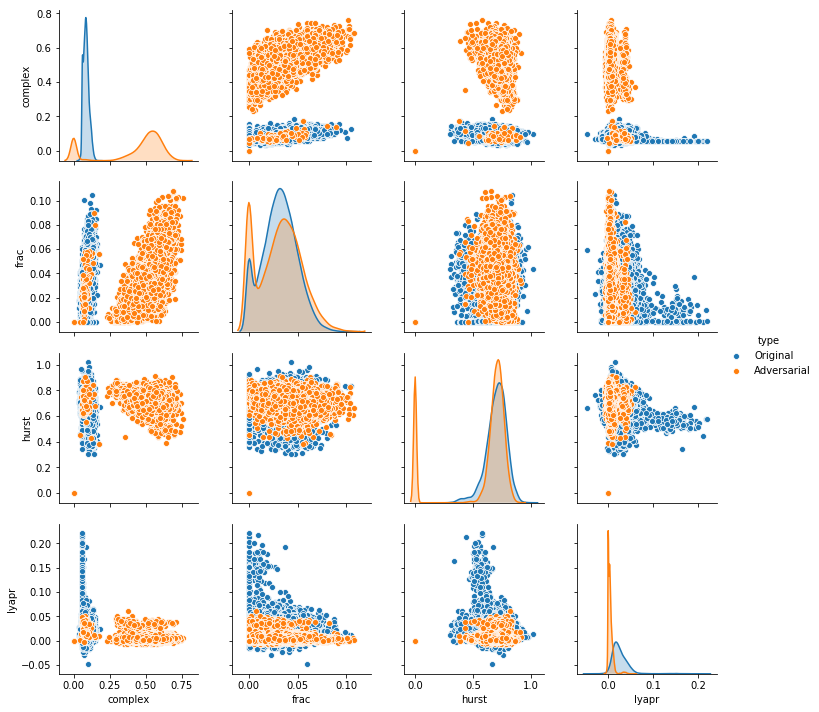

In [11]:
sns.pairplot(df, hue='type');

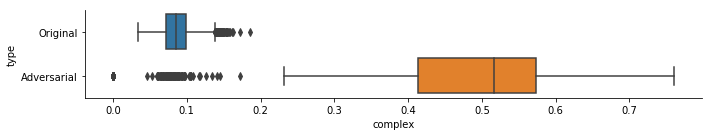

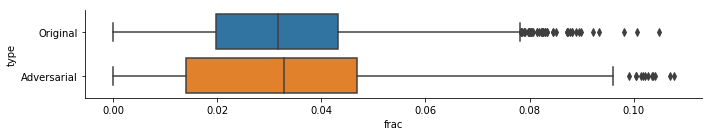

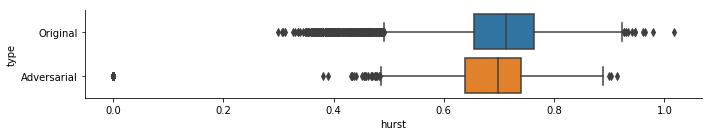

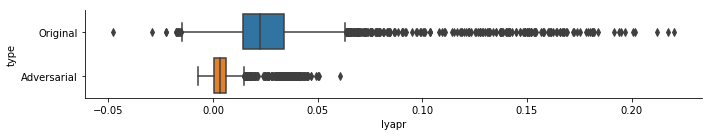

In [12]:
sns.catplot('complex', 'type', kind='box', height=2, aspect=5, data=df);
sns.catplot('frac', 'type', kind='box', height=2, aspect=5, data=df);
sns.catplot('hurst', 'type', kind='box', height=2, aspect=5, data=df);
sns.catplot('lyapr', 'type', kind='box', height=2, aspect=5, data=df);